# <font color='yellow'>Project Data Science </font>
## <font color='yellow'>Statistical Modeling in Socioeconomic Indicators</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('dataset.csv')

In [ ]:
df1.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
df1.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.478,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df1 = pd.DataFrame({'country': df1['Country'],
                   'life_expectancy': df1['Life expectancy '],
                   'year': df1['Year'],
                   'status': df1['Status'],
                   'adult_mortality': df1['Adult Mortality'],
                   'inf_death': df1['infant deaths'],
                   'alcohol': df1['Alcohol'],
                   'hepatitisB': df1['Hepatitis B'],
                   'measles': df1['Measles '],
                   'bmi': df1[' BMI '],
                   'polio': df1['Polio'],
                   'diphtheria': df1['Diphtheria '],
                   'hiv': df1[' HIV/AIDS'],
                   'gdp': df1['GDP'],
                   'total_expenditure': df1['Total expenditure'],
                   'thinness_till19': df1[' thinness  1-19 years'],
                   'thinness_till9': df1[' thinness 5-9 years'],
                   'school': df1['Schooling'],
                   'population': df1[' Population']})

In [ ]:
df1.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
dtype: object

In [ ]:
#Dicionário - Descrição das váriaveis
# Cria um dicionário com a descrição de cada variável
df1_dict_var = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [ ]:
df1_dict_var['alcohol']

'Consumo de álcool per capita (litros de álcool puro por ano).'

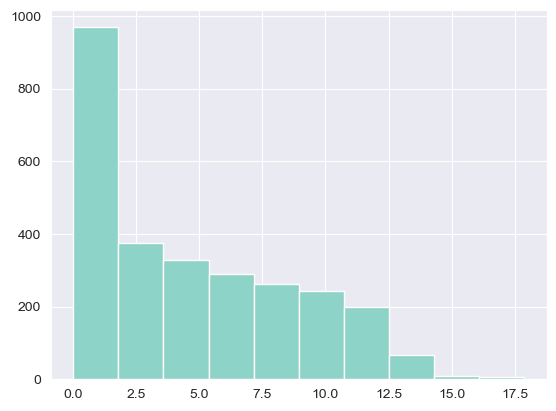

In [ ]:
df1['alcohol'].hist();

In [ ]:
df1.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [ ]:
def data_get_pairs(data, alvo, atributos, n):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [ ]:
alvo = ['alcohol']

In [ ]:
# Vamos usar alguns atributos -Alvo
atributos = ['population', 'life_expectancy', 'gdp', 'total_expenditure', 'adult_mortality', 'hiv'] 

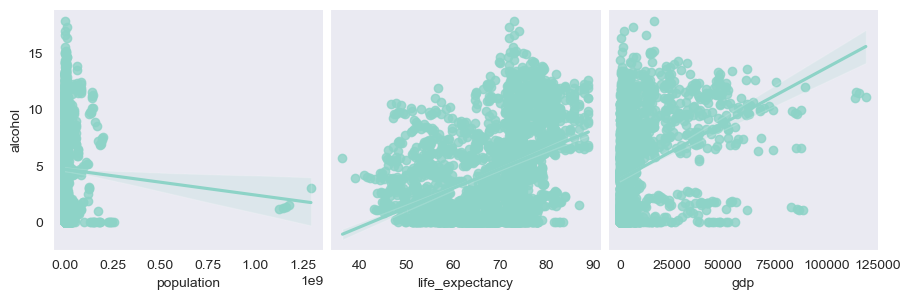

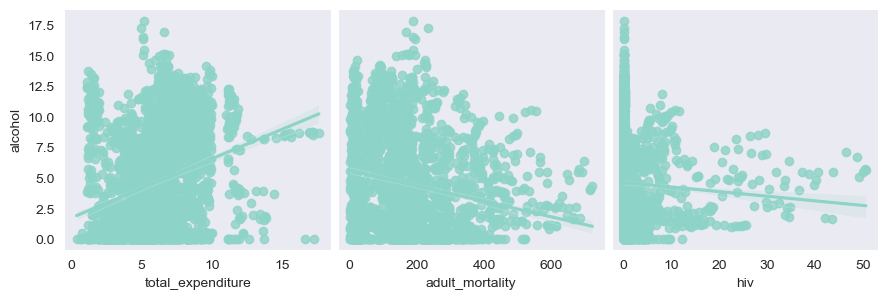

In [ ]:
data_get_pairs(df1, alvo, atributos, 3)

In [ ]:
df1.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [ ]:
valores_ausentes = df1.isnull().sum().sort_values(ascending = False)

In [ ]:
print(valores_ausentes)

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinness_till9        34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64


In [ ]:
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df1.shape[0]
print(f'{valores_ausentes_percent * 100} %')

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinness_till9        1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64 %


In [ ]:
# Atributos com mais de 5% de valores missing
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

In [ ]:
df_missing = df1[atributos]

In [ ]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = df_missing.quantile(0.25)
Q3 = df_missing.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df_missing < (Q1 - 1.5 * IQR)) | (df_missing > (Q3 + 1.5 * IQR))).sum()

In [ ]:
outliers

population           294
hepatitisB           254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [ ]:
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(df_missing)) * 100})

In [ ]:
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


In [ ]:
#Definindop os limites p/ filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [ ]:
novo_df1 = df1[~((df_missing < limite_inferior) | (df_missing > limite_superior)).any(axis=1)]

In [ ]:
novo_df1.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [ ]:
novo_df1.population.max()

17899562.0

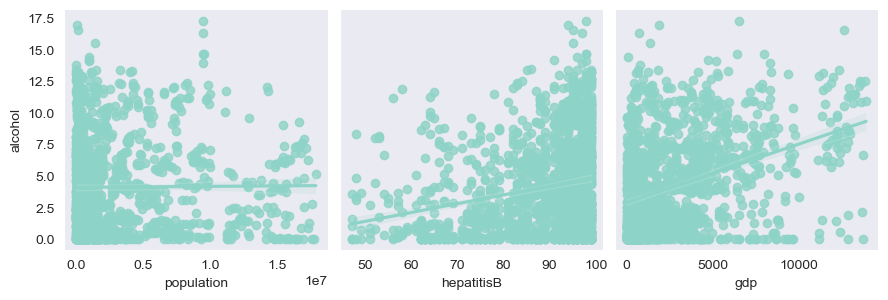

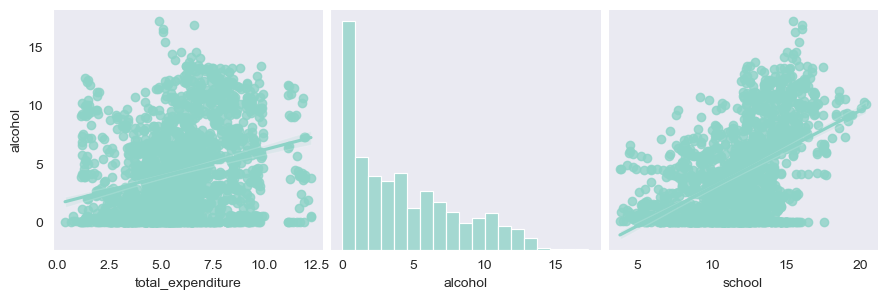

In [ ]:
data_get_pairs(novo_df1, alvo, atributos, 3)

In [ ]:
valores_ausentes = novo_df1.isnull().sum().sort_values(ascending = False)
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df1.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thinness_till9        0.587084
thinness_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphtheria            0.146771
dtype: float64 %


In [ ]:
def impute_median(dados):
    return dados.fillna(dados.median())

In [ ]:
novo_df1.loc[:,'population'] = novo_df1['population'].transform(impute_median)
novo_df1.hepatitisB = novo_df1['hepatitisB'].transform(impute_median)
novo_df1.alcohol = novo_df1['alcohol'].transform(impute_median)
novo_df1.total_expenditure = novo_df1['total_expenditure'].transform(impute_median)
novo_df1.gdp = novo_df1['gdp'].transform(impute_median)
novo_df1.school = novo_df1['school'].transform(impute_median)

In [ ]:
valores_ausentes = novo_df1.isnull().sum().sort_values(ascending = False)
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df1.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

bmi                0.587084
thinness_till9     0.587084
thinness_till19    0.587084
adult_mortality    0.391389
life_expectancy    0.391389
diphtheria         0.146771
polio              0.146771
dtype: float64 %


In [ ]:
novo_df1.dropna(inplace = True)

In [ ]:
valores_ausentes = novo_df1.isnull().sum().sort_values(ascending = False)
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df1.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

Series([], dtype: float64) %


In [ ]:
novo_df1.shape

(2023, 19)

In [ ]:
novo_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphtheria         2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinness_till19    2023 non-null   float64
 16  thinness_till9     2023 non-n

In [ ]:
#Drop variaveis categoricas
novo_df1.drop(['country', 'status'], axis = 1, inplace = True)

In [ ]:
# Criamos os pontos de corte (cutoffs) com 2 percentis como referência
pontos_corte = [novo_df1.population.quantile(0.33), novo_df1.population.quantile(0.67)]

In [ ]:
novo_df1['pop_size'] = 1

In [ ]:
novo_df1.loc[(novo_df1.population < pontos_corte[1]) & (novo_df1.population > pontos_corte[0]), 'pop_size'] = 2

In [ ]:
novo_df1.loc[novo_df1.population >= pontos_corte[1], 'pop_size'] = 3

In [ ]:
novo_df1['lifestyle'] = 0
novo_df1.lifestyle = novo_df1['bmi'] * novo_df1['alcohol']

In [ ]:
missing_values = novo_df1.isnull().sum().sort_values(ascending = False)
missing_values

life_expectancy      0
hiv                  0
pop_size             0
population           0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
diphtheria           0
year                 0
polio                0
bmi                  0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
lifestyle            0
dtype: int64

In [ ]:
novo_df1.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
life_expectancy,1.000000,0.204556,-0.658916,-0.206443,0.342425,0.257860,-0.115350,0.557954,0.452564,0.483659,-0.573127,0.360736,0.175738,-0.433580,-0.429357,0.708272,-0.105317,-0.117333,0.441366
year,0.204556,1.000000,-0.091760,-0.059838,-0.066639,-0.003178,-0.064347,0.096763,0.147489,0.228939,-0.158820,0.170945,0.070267,-0.059353,-0.055950,0.219471,0.020981,0.013190,-0.017373
adult_mortality,-0.658916,-0.091760,1.000000,0.099370,-0.149204,-0.188950,0.035432,-0.366745,-0.228938,-0.221803,0.512978,-0.197863,-0.090963,0.299104,0.302507,-0.383901,0.096768,0.123785,-0.231128
inf_death,-0.206443,-0.059838,0.099370,1.000000,-0.127545,-0.122515,0.480129,-0.221948,-0.183569,-0.183910,0.039115,-0.120331,-0.121871,0.321487,0.354512,-0.214215,0.111901,0.111776,-0.156769
alcohol,0.342425,-0.066639,-0.149204,-0.127545,1.000000,0.193844,-0.045324,0.310448,0.187916,0.199958,-0.036268,0.289360,0.262657,-0.386629,-0.379482,0.464657,-0.007040,0.002445,0.878858
hepatitisB,0.257860,-0.003178,-0.188950,-0.122515,0.193844,1.000000,-0.043089,0.115409,0.393191,0.391270,-0.090390,0.167829,0.046093,-0.086406,-0.102546,0.263879,-0.056455,-0.028477,0.181579
measles,-0.115350,-0.064347,0.035432,0.480129,-0.045324,-0.043089,1.000000,-0.142187,-0.110853,-0.123043,0.024412,-0.065666,-0.101675,0.133515,0.137056,-0.089084,-0.005326,0.017013,-0.085123
bmi,0.557954,0.096763,-0.366745,-0.221948,0.310448,0.115409,-0.142187,1.000000,0.253961,0.273612,-0.244626,0.323198,0.200959,-0.541904,-0.550691,0.552766,-0.056945,-0.041854,0.599062
polio,0.452564,0.147489,-0.228938,-0.183569,0.187916,0.393191,-0.110853,0.253961,1.000000,0.676507,-0.143756,0.198453,0.141294,-0.166819,-0.166363,0.382712,-0.045542,-0.041742,0.219793
diphtheria,0.483659,0.228939,-0.221803,-0.183910,0.199958,0.391270,-0.123043,0.273612,0.676507,1.000000,-0.154179,0.222266,0.157976,-0.189487,-0.186992,0.430627,-0.035142,-0.035290,0.225132


In [ ]:
dfCorr = novo_df1.corr()
df_filtro_1 = dfCorr[((dfCorr >= 0.3) | (dfCorr <= -0.3)) & (dfCorr != 1.000)]
df_filtro_1

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
life_expectancy,NaN,NaN,-0.658916,NaN,0.342425,NaN,NaN,0.557954,0.452564,0.483659,-0.573127,0.360736,NaN,-0.433580,-0.429357,0.708272,NaN,NaN,0.441366
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult_mortality,-0.658916,NaN,NaN,NaN,NaN,NaN,NaN,-0.366745,NaN,NaN,0.512978,NaN,NaN,NaN,0.302507,-0.383901,NaN,NaN,NaN
inf_death,NaN,NaN,NaN,NaN,NaN,NaN,0.480129,NaN,NaN,NaN,NaN,NaN,NaN,0.321487,0.354512,NaN,NaN,NaN,NaN
alcohol,0.342425,NaN,NaN,NaN,NaN,NaN,NaN,0.310448,NaN,NaN,NaN,NaN,NaN,-0.386629,-0.379482,0.464657,NaN,NaN,0.878858
hepatitisB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393191,0.391270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measles,NaN,NaN,NaN,0.480129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.557954,NaN,-0.366745,NaN,0.310448,NaN,NaN,NaN,NaN,NaN,NaN,0.323198,NaN,-0.541904,-0.550691,0.552766,NaN,NaN,0.599062
polio,0.452564,NaN,NaN,NaN,NaN,0.393191,NaN,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,0.382712,NaN,NaN,NaN
diphtheria,0.483659,NaN,NaN,NaN,NaN,0.391270,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,NaN,0.430627,NaN,NaN,NaN


In [ ]:
dfCorr = novo_df1.corr()
df_filtro_2 = dfCorr[((dfCorr >= 0.65) | (dfCorr <= -0.65)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('alcohol', axis=1)
df_filtro_2 = df_filtro_2.drop('alcohol', axis=0)
df_filtro_2

,life_expectancy,year,adult_mortality,inf_death,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
life_expectancy,NaN,NaN,-0.658916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708272,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult_mortality,-0.658916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inf_death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hepatitisB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
polio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diphtheria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final = pd.DataFrame({'life_expectancy': novo_df1['life_expectancy'],                              
                              'alcohol': novo_df1['alcohol'],
                              'diphtheria': novo_df1['diphtheria'],                       
                              'thinness_till19': novo_df1['thinness_till19'],
                              'school': novo_df1['school'],
                              'lifestyle': novo_df1['lifestyle'],})

In [ ]:
df_final.head()

,life_expectancy,alcohol,diphtheria,thinness_till19,school,lifestyle
1,59.9,0.01,62.0,17.5,10.0,0.186
3,59.5,0.01,67.0,17.9,9.8,0.176
4,59.2,0.01,68.0,18.2,9.5,0.172
5,58.8,0.01,66.0,18.4,9.2,0.167
6,58.6,0.01,63.0,18.6,8.9,0.162


In [ ]:
corr_map = df_final.corr()
corr_map

,life_expectancy,alcohol,diphtheria,thinness_till19,school,lifestyle
life_expectancy,1.000000,0.342425,0.483659,-0.433580,0.708272,0.441366
alcohol,0.342425,1.000000,0.199958,-0.386629,0.464657,0.878858
diphtheria,0.483659,0.199958,1.000000,-0.189487,0.430627,0.225132
thinness_till19,-0.433580,-0.386629,-0.189487,1.000000,-0.424922,-0.449094
school,0.708272,0.464657,0.430627,-0.424922,1.000000,0.528939
lifestyle,0.441366,0.878858,0.225132,-0.449094,0.528939,1.000000


In [ ]:

def CorrMat(df, dropDuplicates = True, xrot = 70, yrot = 0, label = 'Variable'):


    if dropDuplicates:
        mask = np.zeros_like(df, dtype = bool)
        mask[np.triu_indices_from(mask)] = True

    sns.set_style(style = 'dark')
    fig, ax = plt.subplots(figsize = (8, 8))

    plt.title("Matriz de Correlação")

    if dropDuplicates:
        sns.heatmap(df, mask = mask, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)

    else:
        sns.heatmap(df, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation = xrot)
        plt.yticks(rotation = yrot)
    return

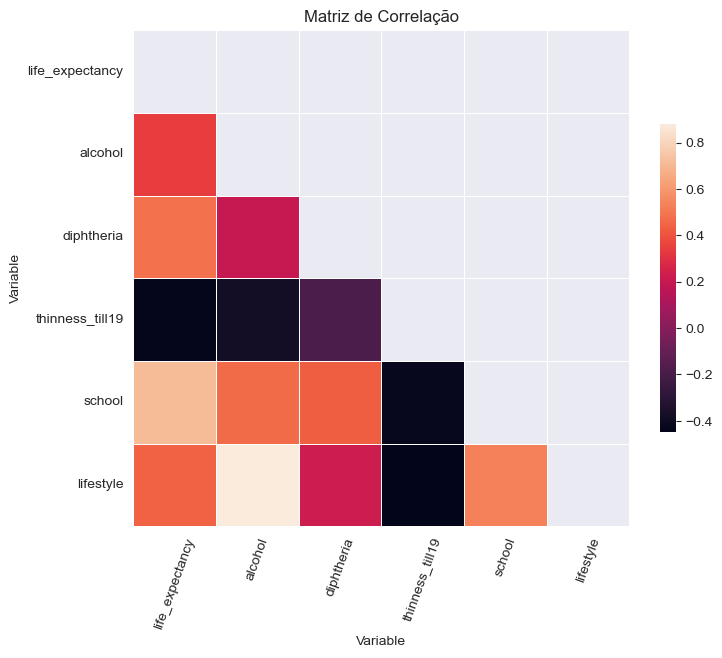

In [ ]:
CorrMat(corr_map)

In [ ]:
formula = 'alcohol ~ life_expectancy +  diphtheria + thinness_till19 + school + lifestyle'

In [ ]:
modelo_v1 = ols(formula, data = df_final).fit()

In [ ]:
print(f"R-squared: {modelo_v1.rsquared}")

R-squared: 0.7770469562680575


In [ ]:
print(f"Coeficientes:\n{modelo_v1.params}")

Coeficientes:
Intercept          2.999309
life_expectancy   -0.041235
diphtheria         0.004467
thinness_till19   -0.003935
school             0.073543
lifestyle          0.015691
dtype: float64


In [ ]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1406.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:41:30   Log-Likelihood:                -4000.6
No. Observations:                2023   AIC:                             8013.
Df Residuals:                    2017   BIC:                             8047.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9993      0.353      8.486      0.000       2.306       3.692
life_expectancy    -0.0412      0.006     -6.425      0.000      -0.054      -0.029
diphtheria          0.0045      0.002      2.065      0.039       0.000       0.009
thinness_till19    -0.0039      0.011     -0.350      0.727      -0.026       0.018
school              0.0735      0.021      3.427      0.001       0.031       0.116
lifestyle           0.0157      0.000     68.377      0.000       0.015       0.016
==============================================================================
Omnibus:                     1161.681   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10180.346
Skew:                           2.614   Prob(JB):                         0.00
Kurtosis:                      12.667   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula = 'alcohol ~ life_expectancy +  diphtheria  + school + lifestyle'

In [ ]:
modelo_v2 = ols(formula, data = df_final).fit()

In [ ]:
print(f"R-squared: {modelo_v2.rsquared}")

R-squared: 0.7770334491531212


In [ ]:
print(f"Coeficientes:\n{modelo_v2.params}")

Coeficientes:
Intercept          2.941525
life_expectancy   -0.040810
diphtheria         0.004433
school             0.074229
lifestyle          0.015713
dtype: float64


In [ ]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1758.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:30:41   Log-Likelihood:                -4000.7
No. Observations:                2023   AIC:                             8011.
Df Residuals:                    2018   BIC:                             8039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9415      0.312      9.418      0.000       2.329       3.554
life_expectancy    -0.0408      0.006     -6.477      0.000      -0.053      -0.028
diphtheria          0.0044      0.002      2.051      0.040       0.000       0.009
school              0.0742      0.021      3.474      0.001       0.032       0.116
lifestyle           0.0157      0.000     71.240      0.000       0.015       0.016
==============================================================================
Omnibus:                     1164.380   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10257.373
Skew:                           2.620   Prob(JB):                         0.00
Kurtosis:                      12.707   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
atributos  = ['life_expectancy' , 'diphtheria',  'school' ,'lifestyle'] 

In [ ]:
scaler = StandardScaler()
scaler.fit(df_final[atributos])
scaled_features = scaler.transform(df_final[atributos])

In [ ]:
df_final2 = pd.DataFrame(scaled_features, columns = atributos, index = df_final.index)
df_final2.head()

,life_expectancy,diphtheria,school,lifestyle
1,-0.915769,-1.070929,-0.658477,-0.854062
3,-0.959346,-0.830592,-0.730539,-0.854109
4,-0.992029,-0.782525,-0.838631,-0.854128
5,-1.035607,-0.878660,-0.946724,-0.854152
6,-1.057395,-1.022861,-1.054817,-0.854176


In [ ]:
modelo_v3 = sm.OLS(endog = df_final['alcohol'], 
                   exog = sm.add_constant(df_final2.values)).fit()

In [ ]:
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1758.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:42:13   Log-Likelihood:                -4000.7
No. Observations:                2023   AIC:                             8011.
Df Residuals:                    2018   BIC:                             8039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2180      0.039    108.377      0.000       4.142       4.294
x1            -0.3746      0.058     -6.477      0.000      -0.488      -0.261
x2             0.0922      0.045      2.051      0.040       0.004       0.180
x3             0.2060      0.059      3.474      0.001       0.090       0.322
x4             3.2897      0.046     71.240      0.000       3.199       3.380
==============================================================================
Omnibus:                     1164.380   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10257.373
Skew:                           2.620   Prob(JB):                         0.00
Kurtosis:                      12.707   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our analysis used a statistical model to examine how various factors influence alcohol consumption. The results offer valuable insights that can guide public health strategies.

Key Findings:

- Model Effectiveness: The model proved to be quite effective, explaining around 77% of the variations in life expectancy. This indicates a high degree of accuracy in our ability to predict life expectancy based on the factors analyzed.